# Cancer metacells (generated in the HDG space computed per patient with the dispersion method) integrated with ScGen and processed in the same HDG space used to generate metacells

In [1]:
## import libraries
import scanpy as sc
import pandas as pd
import numpy as np

In [2]:
sc.settings.set_figure_params(dpi_save=300, frameon=False, format='png')
sc.settings.figdir = "/home/marta.sallese/ov_cancer_atlas/atlas_project/plots_def/integration/metacells/"

In [3]:
import configparser

# Read configuration file
config = configparser.ConfigParser()
config.read("../../utils/config.ini")

rawPath = config.get("DEFAULT", "rawPath")

adata = sc.read(rawPath + 'integration/metacells/seacells_cancer_hdg_patients_batch_corr_scgen_tissuetreat.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 8735 × 17054
    obs: 'tissue', 'developmental_stage', 'treatment', 'recurrence', 'tumor_stage', 'paper_ID', 'anatomical_location', 'dataset', 'SEACell', '# Single Cells', 'tissue-treatment', '_scvi_batch', '_scvi_labels', 'concat_batch'
    uns: '_scvi_manager_uuid', '_scvi_uuid'
    obsm: 'corrected_latent', 'latent'

In [5]:
adata.obs

,tissue,developmental_stage,treatment,recurrence,tumor_stage,paper_ID,anatomical_location,dataset,SEACell,# Single Cells,tissue-treatment,_scvi_batch,_scvi_labels,concat_batch
SEACell_patient_tissue,,,,,,,,,,,,,,
SEACell-5_Geistlinger_59_Metastasis,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,Geistlinger,SEACell-5,99,Metastasis_CHT,0,2,0
SEACell-7_Geistlinger_59_Metastasis,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,Geistlinger,SEACell-7,106,Metastasis_CHT,0,2,0
SEACell-2_Geistlinger_59_Metastasis,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,Geistlinger,SEACell-2,109,Metastasis_CHT,0,2,0
SEACell-8_Geistlinger_59_Metastasis,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,Geistlinger,SEACell-8,73,Metastasis_CHT,0,2,0
SEACell-6_Geistlinger_59_Metastasis,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,Geistlinger,SEACell-6,50,Metastasis_CHT,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SEACell-88_Vasquez_118_Metastasis,Metastasis,Advanced stage,Naive,Unknown,IVB,Vasquez_118,Peritoneum,Vasquez,SEACell-88,9,Metastasis_Naive,51,4,0
SEACell-67_Vasquez_118_Metastasis,Metastasis,Advanced stage,Naive,Unknown,IVB,Vasquez_118,Peritoneum,Vasquez,SEACell-67,7,Metastasis_Naive,51,4,0
SEACell-32_Vasquez_118_Metastasis,Metastasis,Advanced stage,Naive,Unknown,IVB,Vasquez_118,Peritoneum,Vasquez,SEACell-32,4,Metastasis_Naive,51,4,0


In [6]:
adata.obs = adata.obs.drop(columns=['_scvi_batch', '_scvi_labels', 'concat_batch'])

In [7]:
hvg = pd.read_csv('/home/marta.sallese/ov_cancer_atlas/atlas_project/script/hdg/cancer/atlas_cancer_hdg_dispersion_patients.csv',  index_col=0)

In [8]:
hvg[hvg.highly_variable]

,highly_variable
FAM87B,True
SAMD11,True
PLEKHN1,True
HES4,True
ISG15,True
...,...
MT-ND3,True
MT-ND4L,True
MT-ND5,True
MT-ND6,True


In [9]:
hvg.highly_variable.sum()

5028

In [10]:
adata.var

""
FAM87B
LINC00115
FAM41C
SAMD11
NOC2L
...
MT-ND4L
MT-ND4
MT-ND5
MT-ND6


In [11]:
adata.var['highly_variable']=hvg.highly_variable

In [12]:
adata.var

,highly_variable
FAM87B,True
LINC00115,NaN
FAM41C,NaN
SAMD11,True
NOC2L,NaN
...,...
MT-ND4L,True
MT-ND4,NaN
MT-ND5,True
MT-ND6,True


In [13]:
adata.var.highly_variable = adata.var.highly_variable.fillna(False)

In [14]:
adata.var

,highly_variable
FAM87B,True
LINC00115,False
FAM41C,False
SAMD11,True
NOC2L,False
...,...
MT-ND4L,True
MT-ND4,False
MT-ND5,True
MT-ND6,True


In [15]:
# you can skip this passage if you specify use_highly_variable = True when computing embeddings
# adata.raw = adata
# adata = adata[:, adata.var.highly_variable]

In [16]:
adata.var_names

Index(['FAM87B', 'LINC00115', 'FAM41C', 'SAMD11', 'NOC2L', 'KLHL17', 'PLEKHN1',
       'HES4', 'ISG15', 'AGRN',
       ...
       'MT-CO2', 'MT-ATP8', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4L', 'MT-ND4',
       'MT-ND5', 'MT-ND6', 'MT-CYB'],
      dtype='object', length=17054)

In [17]:
cell_cycle_genes = [x.strip() for x in open('/home/marta.sallese/ov_cancer_atlas/regev_lab_cell_cycle_genes.txt')]

s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata.var_names]

sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


In [18]:
sc.tl.pca(adata, use_highly_variable=True)

In [19]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=50)
sc.tl.umap(adata)

/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


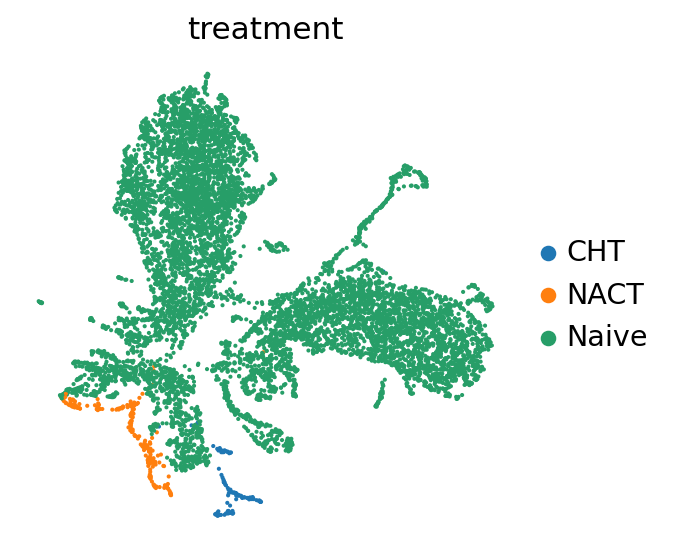

/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


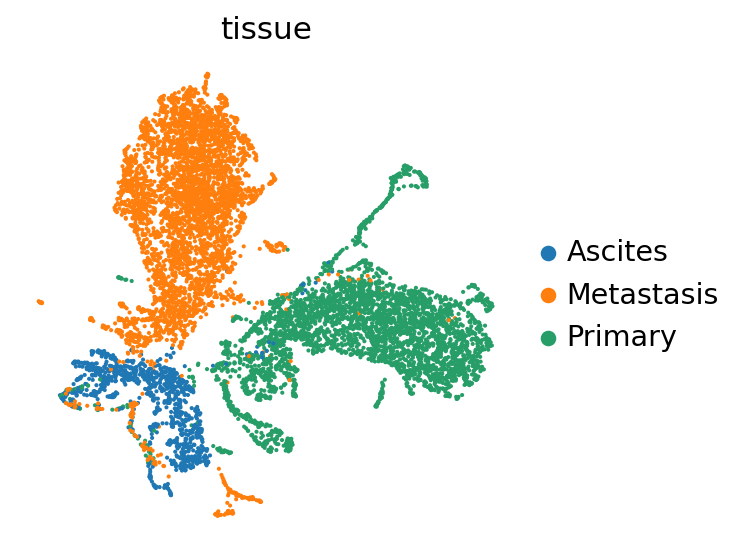

/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


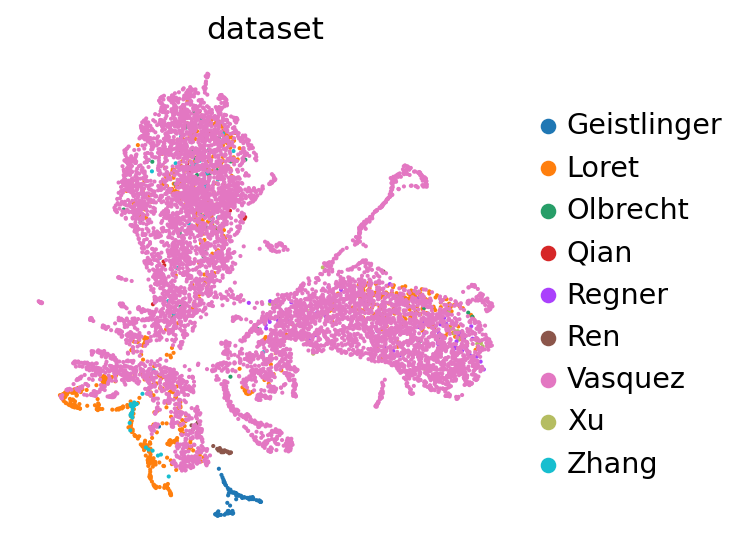

/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


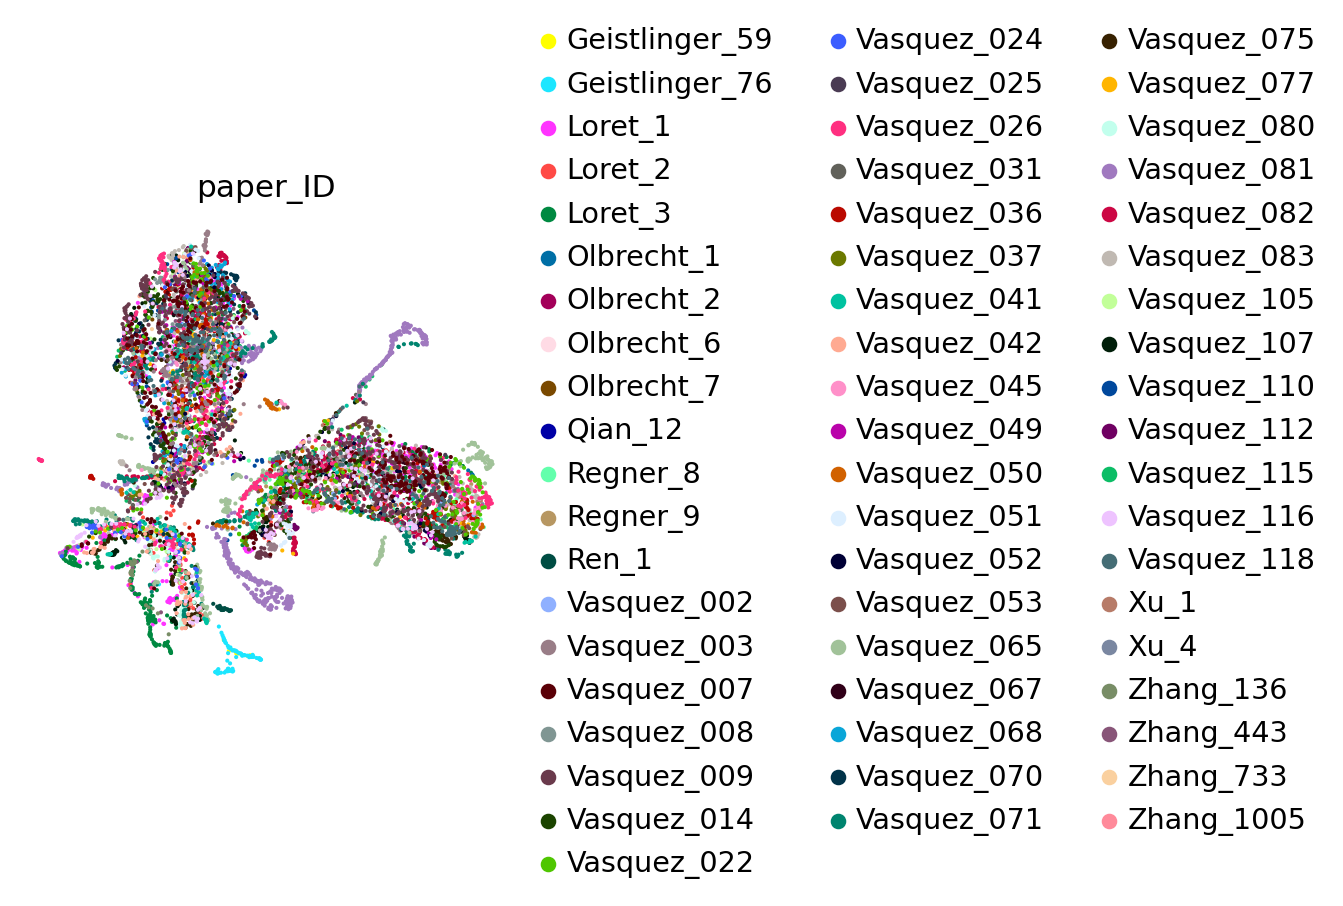

/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


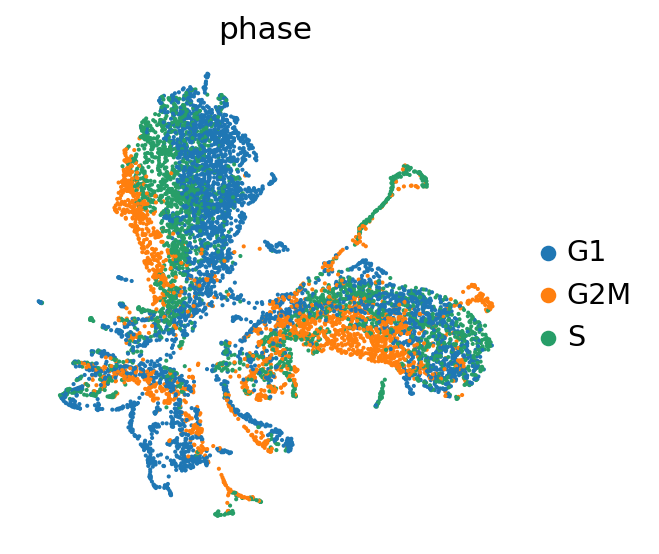

/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


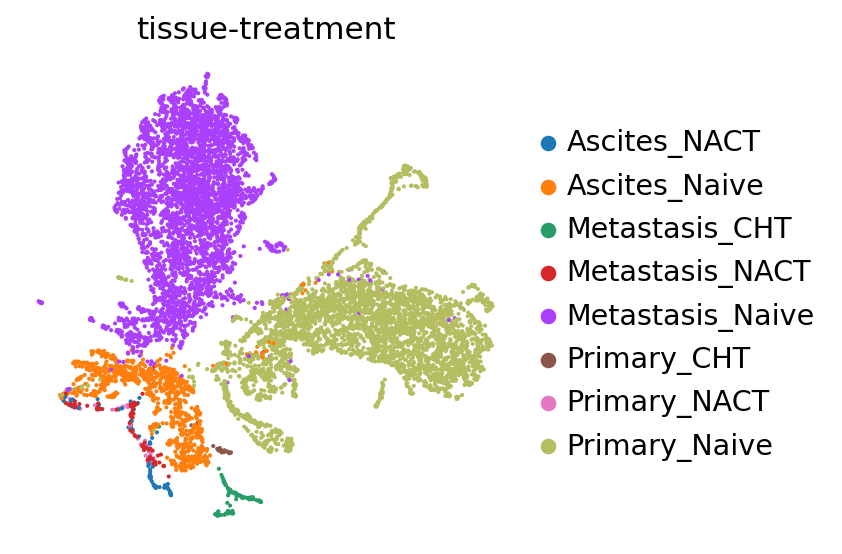

In [21]:
sc.pl.umap(adata, color=["treatment"], frameon=False, save='/home/marta.sallese/ov_cancer_atlas/atlas_project/plots_def/integration/metacells/cancer_seacells_HDG_treatm.png')
sc.pl.umap(adata, color=["tissue"], frameon=False, save='/home/marta.sallese/ov_cancer_atlas/atlas_project/plots_def/integration/metacells/cancer_seacells_HDG_tissue.png')
sc.pl.umap(adata, color=["dataset"], frameon=False, save='/home/marta.sallese/ov_cancer_atlas/atlas_project/plots_def/integration/metacells/cancer_seacells_HDG_dataset.png')
sc.pl.umap(adata, color=["paper_ID"], frameon=False, save='/home/marta.sallese/ov_cancer_atlas/atlas_project/plots_def/integration/metacells/cancer_seacells_HDG_patients.png')
sc.pl.umap(adata, color=["phase"], frameon=False, save='/home/marta.sallese/ov_cancer_atlas/atlas_project/plots_def/integration/metacells/cancer_seacells_HDG_cellcycle.png')
sc.pl.umap(adata, color=["tissue-treatment"], frameon=False, save='/home/marta.sallese/ov_cancer_atlas/atlas_project/plots_def/integration/metacells/cancer_seacells_HDG_tissue-treat.png')

In [21]:
adata.write('/group/testa/Project/OvarianAtlas/atlas_project/raw_data/integration/metacells/seacells_cancer_hdg_patients_batch_corr_scgen_tissuetreat_HDG.h5ad')